<a href="https://colab.research.google.com/github/Pranshu-007/ML-Model-for-student-data/blob/main/chapter_appendix-tools-for-deep-learning/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Steps**

1.   PreProcess(Check for missing values , outliers , null values hai tou solve it) + EDA(check the graph and some insights) + Feature Selecion(Find useful colums and remove others)
2.   Extract input and output coloms
3.   Scale the values(make data close to each other for more precision)
4.   Train test split model
5.   Evaluate model
2.   Deploy Model








In [27]:
import pandas as pd

In [28]:
df = pd.read_csv("/content/student_data_binary_clear.csv")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CGPA       1000 non-null   float64
 1   IQ         1000 non-null   int64  
 2   Placement  1000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [30]:
import matplotlib.pyplot as plt

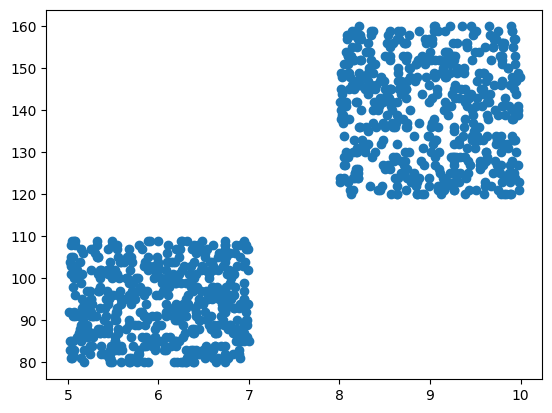

In [31]:
plt.scatter(df['CGPA'],df['IQ'])

In [32]:
x=df.iloc[:,0:2]

In [33]:
y=df.iloc[:,-1]

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.1)

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
x_train=scaler.fit_transform(x_train)
x_train

array([[ 0.71511631,  1.59243039],
       [ 0.94545091,  0.59624823],
       [ 0.77114365,  1.19395753],
       ...,
       [-0.39920514, -0.55932308],
       [ 0.45988067,  0.63609552],
       [ 0.62796268,  1.55258311]])

In [39]:
x_test = scaler.transform(x_test)
x_test

array([[-1.26451621, -0.83825408],
       [-0.4054304 , -1.27657423],
       [-0.33072729, -1.0773378 ],
       [-0.44900722, -0.43978122],
       [ 0.34160074,  0.47670637],
       [-0.49258403, -0.95779594],
       [ 0.67153949,  1.55258311],
       [ 0.95167617,  0.83533195],
       [ 0.6404132 ,  1.63227768],
       [ 1.26293915,  0.75563738],
       [ 0.96412669,  0.3970118 ],
       [-0.35562832, -0.87810137],
       [-1.04040687, -1.31642152],
       [ 1.11353292,  1.31349939],
       [-0.76027019, -1.19687966],
       [ 1.05750558,  0.95487381],
       [-1.23338991, -1.0773378 ],
       [ 0.42252911,  0.51655366],
       [ 0.53458378,  0.79548466],
       [ 0.89564884,  1.23380481],
       [-1.1586868 , -0.67886494],
       [-1.28941725, -1.15703238],
       [-0.47390826, -0.43978122],
       [-0.35562832, -1.19687966],
       [ 0.77114365,  0.35716451],
       [-1.33921933, -1.19687966],
       [ 1.08863188,  0.47670637],
       [ 0.41630385,  0.35716451],
       [-0.4054304 ,

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
clf = LogisticRegression()

In [42]:
clf.fit(x_train,y_train)

LogisticRegression()

In [43]:
y_pred = clf.predict(x_test)

In [44]:
y_test

,Placement
888,0
715,0
700,0
923,0
100,1
...,...
940,0
419,1
762,0
88,1


In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_test, y_pred)

1.0

In [47]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

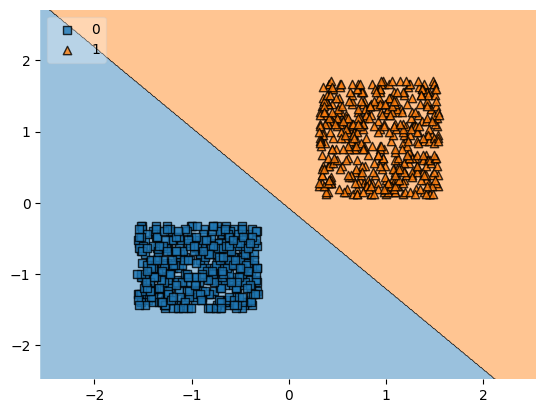

In [48]:
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)

In [50]:
import pickle

In [51]:
pickle.dump(clf,open('model.pkl','wb'))